1-PACKAGES

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import numpy as np
import pandas as pd
import pathlib
import random
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2 as cv
import os

pathlib.Path("/content/drive/MyDrive/Image")

# Đường dẫn đến thư mục chứa ảnh training
train_folder_paths_c = '/content/drive/MyDrive/Image/Train/Chihuahua'
train_folder_paths_p = '/content/drive/MyDrive/Image/Train/chó Pug'

# Đường dẫn đến thư mục chứa ảnh test
test_folder_paths_c = '/content/drive/MyDrive/Image/Test/Chihuahua'
test_folder_paths_p = '/content/drive/MyDrive/Image/Test/chó Pug'

2-DATASET

In [133]:
# Hàm đọc và tiền xử lý hình ảnh
def load_and_preprocess_image(image_path, target_size=(100, 100)):
    image = Image.open(image_path)
    image = image.convert('RGB')  # Chuyển đổi sang ảnh RGB nếu cần thiết
    image = image.resize(target_size)  # Resize ảnh về kích thước mong muốn
    image_array = np.array(image)/255  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
    return image_array
# Hàm load dữ liệu từ thư mục
def load_data_from_folder(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        label = folder_path.split('/')[-1]  # Sử dụng tên thư mục làm nhãn
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            images.append(load_and_preprocess_image(img_path))
            labels.append(label)
    return images, labels

# Load dữ liệu từ thư mục training
Img_train_c, label_train_c = load_data_from_folder(train_folder_paths_c)
Img_train_p, label_train_p = load_data_from_folder(train_folder_paths_p)
Img_train = Img_train_c + Img_train_p
label_train = label_train_c + label_train_p

# Chuyển đổi nhãn sang dạng số
label_to_idx_train = {label: idx for idx, label in enumerate(np.unique(label_train))}
label_train = [label_to_idx_train[label] for label in label_train]

# Load dữ liệu từ thư mục test
Img_test_c, label_test_c = load_data_from_folder(test_folder_paths_c)
Img_test_p, label_test_p = load_data_from_folder(test_folder_paths_p)
Img_test = Img_test_c + Img_test_p
label_test = label_test_c + label_test_p

# Chuyển đổi nhãn sang dạng số
label_to_idx_test = {label: idx for idx, label in enumerate(np.unique(label_test))}
label_test = [label_to_idx_test[label] for label in label_test]

# In kích thước của dữ liệu huấn luyện và kiểm tra
print("Kích thước tập huấn luyện:", len(Img_train), len(label_train))
print("Kích thước tập kiểm tra:", len(Img_test), len(label_test))


Kích thước tập huấn luyện: 608 608
Kích thước tập kiểm tra: 215 215


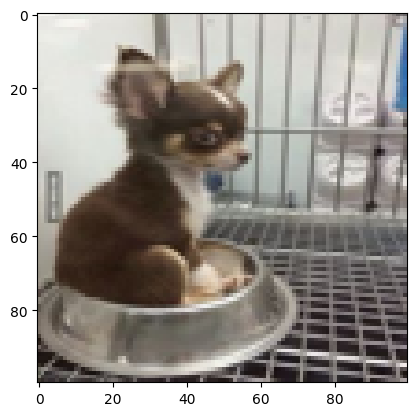

In [134]:
index = 300
plt.imshow(Img_train[index])

In [135]:
print(Img_train[315])

[[[1.         0.99607843 1.        ]
  [1.         1.         1.        ]
  [0.8        0.84313725 0.84705882]
  ...
  [0.43137255 0.45098039 0.4       ]
  [0.42352941 0.41960784 0.36862745]
  [0.43529412 0.42745098 0.36862745]]

 [[1.         0.99607843 1.        ]
  [1.         1.         1.        ]
  [0.85098039 0.89411765 0.89803922]
  ...
  [0.43137255 0.45490196 0.40392157]
  [0.42352941 0.41960784 0.36862745]
  [0.44313725 0.43137255 0.36470588]]

 [[1.         0.99607843 1.        ]
  [1.         1.         1.        ]
  [0.89803922 0.94117647 0.94117647]
  ...
  [0.44705882 0.46666667 0.41568627]
  [0.43137255 0.42745098 0.37254902]
  [0.45882353 0.44313725 0.36862745]]

 ...

 [[0.23529412 0.18431373 0.18823529]
  [0.2627451  0.17254902 0.19607843]
  [0.33333333 0.22352941 0.23137255]
  ...
  [0.38431373 0.25098039 0.28235294]
  [0.39607843 0.25882353 0.28235294]
  [0.36470588 0.2745098  0.32941176]]

 [[0.34509804 0.19607843 0.18039216]
  [0.30196078 0.20392157 0.21568627]


In [136]:
# Chuyển đổi danh sách thành các tensor NumPy
Img_train_np = np.array(Img_train)
label_train_np = np.array(label_train)
label_train_np = np.concatenate((np.ones(len(label_train_c)), np.zeros(len(label_train_p))))

Img_test_np = np.array(Img_test)
label_test_np = np.array(label_test)
label_test_np = np.concatenate((np.ones(len(label_test_c)), np.zeros(len(label_test_p))))

# Sử dụng thuộc tính shape
m_train = Img_train_np.shape[0] #số lượng mẫu trong tập train
num_px = Img_train_np.shape[1] #số lượng pixal trong 1 chiều ảnh
m_test = len(Img_test)  # Không cần chuyển đổi vì Img_test đã là một danh sách

# Chuyển đổi hình dạng của label_train và label_test
label_train_np = label_train_np.reshape(1, -1)
label_test_np = label_test_np.reshape(1, -1)
print("Img_train_shape:", Img_train_np.shape)
print("label_train_shape:", label_train_np.shape)
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("Img_test shape: " + str(Img_test_np.shape))
print ("label_test shape: " + str(label_test_np.shape))

Img_train_shape: (608, 100, 100, 3)
label_train_shape: (1, 608)
Each image is of size: (100, 100, 3)
Img_test shape: (215, 100, 100, 3)
label_test shape: (1, 215)


In [137]:
Img_train_flatten = Img_train_np.reshape(Img_train_np.shape[0],-1).T #Làm phẳng và chuyển vị ma trận
Img_test_flatten = Img_test_np.reshape(Img_test_np.shape[0],-1).T
# The "-1" makes reshape flatten the remaining dimensions

img_train = Img_train_flatten
img_test = Img_test_flatten
#standdardize data to have feature values between 0 and 1

print("img_train's shape: " + str(img_train.shape))
print("img_test's shape: " + str(img_test.shape))

img_train's shape: (30000, 608)
img_test's shape: (30000, 215)


3-BUILD A DEEP NEURAL NETWORK

In [138]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

In [139]:
def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z
    return A, cache

In [140]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

In [141]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)

    return dZ

4 - 6 LAYER NEURAL NETWORK


In [142]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])#*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

In [143]:
def linear_forward(A, W, b):
    Z = W.dot(A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

In [144]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [145]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1,X.shape[1]))

    return AL, caches

In [146]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost

In [147]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [148]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [149]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [150]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.

    for i in range(1,L+1):
        parameters["W" + str(i)] = parameters["W" + str(i)] - learning_rate*grads["dW"+str(i)]
        parameters["b" + str(i)] = parameters["b" + str(i)] - learning_rate*grads["db"+str(i)]

    return parameters


In [151]:
### CONSTANTS ###
layers_dims = [30000, 11, 14, 10,12,10, 1] #  6-layer model

In [152]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.032, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization. (≈ 1 line of code)

    parameters = initialize_parameters_deep(layers_dims)


    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.

        AL, caches = L_model_forward(X, parameters)


        # Compute cost.

        cost = compute_cost(AL, Y)


        # Backward propagation.

        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###

        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)


        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.695078
Cost after iteration 100: 0.648172
Cost after iteration 200: 0.638424
Cost after iteration 300: 0.575784
Cost after iteration 400: 0.750504
Cost after iteration 500: 0.557226
Cost after iteration 600: 0.502705
Cost after iteration 700: 0.680804
Cost after iteration 800: 0.411629
Cost after iteration 900: 0.696786
Cost after iteration 1000: 0.451510
Cost after iteration 1100: 0.444894
Cost after iteration 1200: 0.886302
Cost after iteration 1300: 0.596903
Cost after iteration 1400: 0.645472
Cost after iteration 1500: 0.339226
Cost after iteration 1600: 0.893652
Cost after iteration 1700: 0.565351
Cost after iteration 1800: 0.380755
Cost after iteration 1900: 0.342554
Cost after iteration 2000: 0.463175
Cost after iteration 2100: 0.599108
Cost after iteration 2200: 0.422398
Cost after iteration 2300: 0.441636
Cost after iteration 2400: 0.417582
Cost after iteration 2500: 0.560674
Cost after iteration 2600: 0.556294
Cost after iteration 2700: 0.314109
Cost

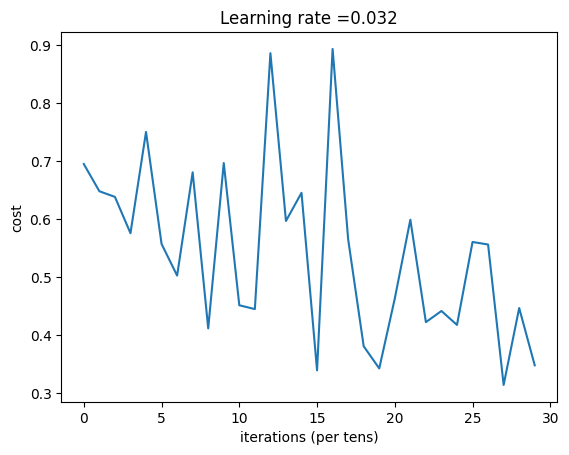

In [153]:
parameters = L_layer_model(img_train, label_train_np, layers_dims, num_iterations =3000, print_cost = True)

In [154]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) # 6 number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

In [155]:
pred_train = predict(img_train,label_train_np, parameters)

Accuracy: 0.7286184210526314


In [156]:
pred_test = predict(img_test,label_test_np, parameters)

Accuracy: 0.5720930232558139


In [157]:
def print_mislabeled_images(classes, X, y, p):
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]

        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

5-TEST

<ipython-input-162-65dffab4858b>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open ('/content/drive/MyDrive/Image/Mặt xệ mới/dog-861141_640.jpg').convert("RGB").resize([num_px,num_px],Image.ANTIALIAS)


Accuracy: 1.0
y = 0.0
Đây là pug


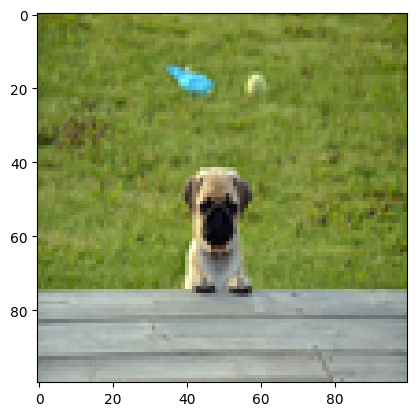

In [162]:
from PIL import Image

fileImage = Image.open ('/content/drive/MyDrive/Image/Mặt xệ mới/dog-861141_640.jpg').convert("RGB").resize([num_px,num_px],Image.ANTIALIAS)
my_label_y = [0] # the true class of image (1 ->chihuaha, 0 -> pug)

image = np.array(fileImage)
my_image = image.reshape(num_px*num_px*3,1)
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) )
if np.squeeze(my_predicted_image) == 0:
    print('Đây là pug')
elif np.squeeze(my_predicted_image) == 1:
    print('Đây là chó chihuahua')
else:
    print('Unknown prediction')